In [144]:
# Import necessary python - module
import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

##### Task #1 | Merge 12 months of sales data into one csv file

In [57]:
# read one csv file (Sales_January_2019.csv) from path directory
df = pd.read_csv(r'/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/sale-dataset_month/1_Sales_January_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [58]:
# Merge 12 months of csv's files into one csv file
# 1. print list of csv file in the path dataset's folder
files = [file for file in os.listdir(r'/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/sale-dataset_month')]

files.sort()

for file in files:
    print(file)

10_Sales_October_2019.csv
11_Sales_November_2019.csv
12_Sales_December_2019.csv
1_Sales_January_2019.csv
2_Sales_February_2019.csv
3_Sales_March_2019.csv
4_Sales_April_2019.csv
5_Sales_May_2019.csv
6_Sales_June_2019.csv
7_Sales_July_2019.csv
8_Sales_August_2019.csv
9_Sales_September_2019.csv


In [59]:
# generate merged data 'all_months_data.csv' and save it to the project directory
from pathlib import Path

files = [file for file in os.listdir(r'/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/sale-dataset_month')]

all_months_data = pd.DataFrame()

for file in files:
    df_merged = pd.read_csv(r'/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/sale-dataset_month/' + file)
    all_months_data = pd.concat([all_months_data, df_merged])

filepath = Path('/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/all_sales_data.csv')

all_months_data.to_csv(filepath, index=False)

In [60]:
#read and check info of merged data
df_sales = pd.read_csv(r'/home/achmadadyatma/Documents/learncode/my-data-analyst_project/sales_data-analysis/all_sales_data.csv')
print(df_sales.head())
print(df_sales.info())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          1863

##### Task #2 | Clean up data
1. Remove of NaN (Not a Number) values
2. Dealing with date time column 'Order Date'
3. Convert original dataset columns to the correct type
4. Augmenting data with additional needed columns

In [61]:
# 1. Remove of NaN (Not a Number) values
#Find NaN values
nan_df = df_sales[df_sales.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#Drop NaN values
df_sales = df_sales.dropna(how='all')
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [63]:
#Check whether the value of NaN still exists in the data or not
nan_df2 = df_sales[df_sales.isna().any(axis=1)]
nan_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [64]:
#2. Dealing with date time column - 'Order Date'
# Convert 'Order Date' column as object datatype to datetime object
# errors = 'coerce' will ignone all non - numeric values. it will replace all non - numeric values with NaT (Not a Time).
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], errors ='coerce')
df_sales.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [65]:
# Find records that have NaT values
df_sales[df_sales['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [66]:
# Drop NaT values from all records
df_sales = df_sales.dropna()

In [67]:
# Check whether NaT values already removed / droped or not
df_sales[df_sales['Order Date'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [68]:
# 3. Convert original dataset columns to the correct type
# check data type of original dataset
print(df_sales.dtypes)

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [69]:
# Convert original dataset columns to the correct type
# make 'Order ID', 'Quantity Ordered', 'Price Each' as numeric objects (integer or float) and 'Product', 'Purchase Address' as non-numeric objects (string)

convert_dict = {'Order ID' : int,
                'Product'  : "string",
                'Quantity Ordered' : int,
                'Price Each' : float,
                'Purchase Address' : "string"
                }

df_sales = df_sales.astype(convert_dict)
print(df_sales.dtypes)

Order ID                     int64
Product                     string
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            string
dtype: object


In [70]:
#4. Augmenting data with additional needed columns
# 1) add month column as 'int'

df_sales['Month'] = df_sales['Order Date'].dt.month.astype(int)

print("the datatype of Month\'s column is ",df_sales['Month'].dtypes)
df_sales.head()

the datatype of Month's column is  int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [71]:
# 2) add sales column as 'float'
df_sales['Sales'] = df_sales['Quantity Ordered'] * df_sales['Price Each'].astype(float)

print("the datatype of Sales\'s column is", df_sales['Sales'].dtypes)
df_sales.head()

the datatype of Sales's column is float64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [72]:
# 3) add city column as 'String' 
# split sequence of characters from 'Purchase Address'
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df_sales['City'] = df_sales['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})').astype("string")

print("the datatype of City\'s column is", df_sales['City'].dtypes)
df_sales.head()

the datatype of City's column is string


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [104]:
# 4) add hour column as 'int'
df_sales['Hour'] = df_sales['Order Date'].dt.hour.astype(int)

print("the datatype of Hour\'s column is", df_sales['Hour'].dtypes)
df_sales.head()

the datatype of Hour's column is int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [74]:
# 5) add minute column as 'int'
df_sales['Minute'] = df_sales['Order Date'].dt.minute.astype(int)

print("the datatype of Minute\'s column is", df_sales['Minute'].dtypes)
df_sales.head()

the datatype of Minute's column is int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [75]:
# 6) add count columns as int
df_sales['Count'] = 1

print("the datatype of count\'s column is", df_sales['Count'].dtypes)
df_sales.head()

the datatype of count's column is int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [143]:
# check info of new dataframe
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  string        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  string        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  string        
 9   Hour              185950 non-null  int64         
 10  Minute            185950 non-null  int64         
 11  Count             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), string(3)
memory usage: 18.4 MB
None


##### Task #3 | Analysis - Answer 5 important questions
1. What the best month for sales ?
2. What city had the highest number of values ?
3. What time should we display advertisements to maximize the likelihood of customer's buying product ?
4. What products are most often sold together ?
5. What product sold the most ? why do you think it sold the most ? 

In [77]:
# Question 1. What the best month for sales ?
df_sales.groupby('Month').sum()

,Order ID,Quantity Ordered,Price Each,Sales,Hour,Minute,Count
Month,,,,,,,
1,1421630798,10903,1811768.38,1822256.73,139485,282440,9709
2,1871052592,13449,2188884.72,2202022.42,172669,354885,11975
3,2564810956,17005,2791207.83,2807100.38,218969,447559,15153
4,3387347100,20558,3367671.02,3390670.24,262259,544186,18279
5,3345871523,18667,3135125.13,3152606.75,238780,487899,16566
6,2932976072,15253,2562025.61,2577802.26,195528,402436,13554
7,3284139576,16072,2632539.56,2647775.76,206169,417349,14293
8,2899373917,13448,2230345.42,2244467.88,172289,353857,11961
9,2948726831,13109,2084992.09,2097560.13,168513,341698,11621


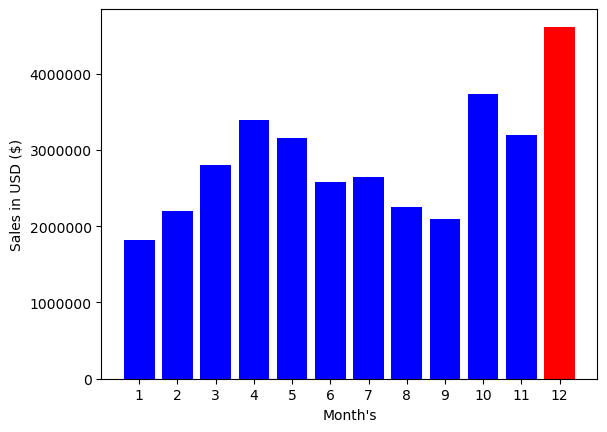

the best selling month occurs in the 12th month (December) : 4613443.34


In [78]:
results_1 = df_sales.groupby('Month').sum()

c = ['Blue', 'Blue','Blue','Blue','Blue','Blue','Blue','Blue','Blue','Blue','Blue', 'Red']

months = range(1, 13)
plt.ticklabel_format(useOffset=False, style='plain')
plt.bar(months, results_1['Sales'], color = c)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month\'s')
plt.show()

print('the best selling month occurs in the 12th month (December) : 4613443.34')

In [79]:
# Question 2. What city had the highest number of sales ?
df_sales.groupby('City').sum()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
City,,,,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,2795498.58,214264,442932,14881
Austin (TX),2280982185,11153,1809873.61,69829,1819581.75,141946,289060,9905
Boston (MA),4598265261,22528,3637409.77,141112,3661642.01,288225,590442,19934
Dallas (TX),3415643578,16730,2752627.82,104620,2767975.40,214390,435155,14820
Los Angeles (CA),6811084693,33289,5421435.23,208325,5452570.80,427444,866638,29605
New York City (NY),5736333884,27932,4635370.83,175741,4664317.43,357696,733598,24876
Portland (ME),563266345,2750,447189.25,17144,449758.27,35211,72856,2455
Portland (OR),2305594747,11303,1860558.22,70621,1870732.34,144421,295533,10010
San Francisco (CA),10304443952,50239,8211461.74,315520,8262203.91,643265,1319477,44732


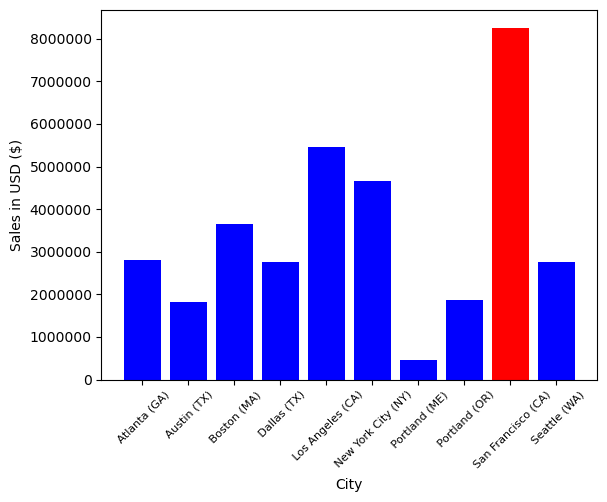

the best selling city occurs in San Fransisco (CA) : 10304443952


In [80]:
results_2 = df_sales.groupby('City').sum()

cities = [City for City, df in df_sales.groupby('City')]

c = ['Blue', 'Blue','Blue','Blue','Blue','Blue','Blue','Blue','Red','Blue']

plt.ticklabel_format(useOffset=False, style='Plain')
plt.bar(cities, results_2['Sales'], color=c)
plt.xticks(cities, rotation =45, size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

print('the best selling city occurs in San Fransisco (CA) : 10304443952')

In [98]:
# Question 3. What time should we display advertisements to maximize the likelihood of customer's buying product ?
df_sales.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0.0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1.0,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2.0,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3.0,831,831,831,831,831,831,831,831,831,831,831
4.0,854,854,854,854,854,854,854,854,854,854,854
5.0,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6.0,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7.0,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8.0,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


<function matplotlib.pyplot.show(close=None, block=None)>

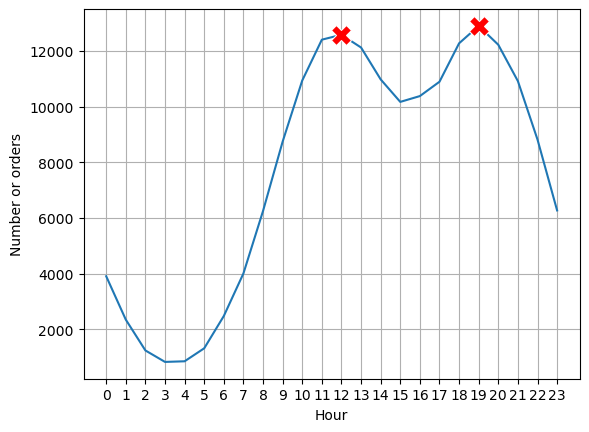

In [142]:
hours = [Hour for Hour, df in df_sales.groupby(['Hour'])]

plt.plot(hours, df_sales.groupby(['Hour']).count()['Count'])

#plot
sns.lineplot(x=[12], y=[12587], marker ="X", markersize = 15, color='red')
sns.lineplot(x=[19], y=[12905], marker ="X", markersize = 15, color='red')

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number or orders')
plt.grid()
plt.show

In [ ]:
# Question 4. what products are most often sold together ?
df_sales = df_sales[df_sales['Order ID'].duplicated(keep=False)]
df_sales['Grouped'] = df_sales.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df_sales = df_sales[['Order ID', 'Grouped']].drop_duplicates()

df_sales.head(100)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [ ]:
count = Counter()

for row in df_sales['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

print('\nProducts are most often sold together are iPhone and lightning charging cable')

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92

Products are most often sold together are iPhone and lightning charging cable


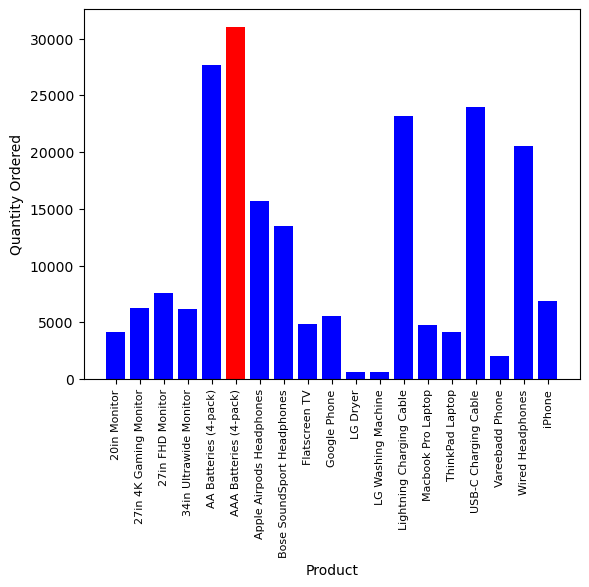

In [84]:
# Question 5. what product sold the most ? why do you think it sold the most ?
product_group = df_sales.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [Product for Product, df in product_group]

c = ['Blue', 'Blue','Blue','Blue','Blue','Red','Blue','Blue','Blue','Blue','Blue', 'Blue','Blue','Blue','Blue','Blue','Blue','Blue','Blue',]

plt.bar(products, quantity_ordered, color = c)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 90, size = 8)
plt.show()



AAA Batteries (4-Pack) is best selling product, it because cheap and mostly needed


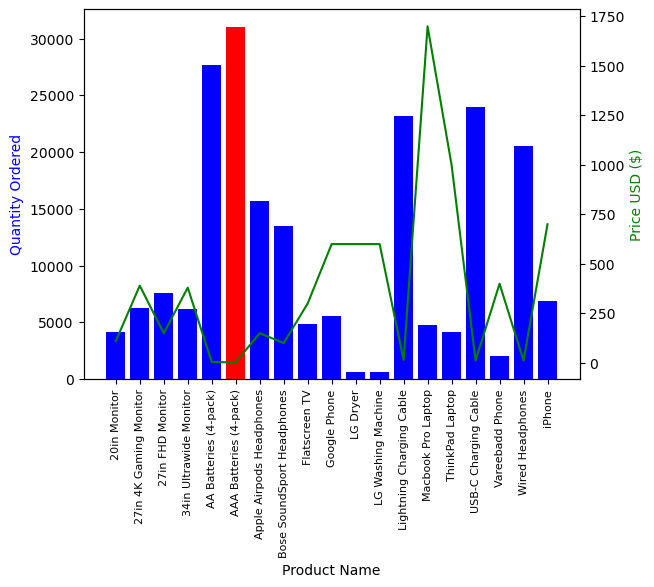

In [85]:
#correlation with deeper analysis (prices each)
prices = df_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

c = ['Blue','Blue','Blue','Blue','Blue','Red','Blue','Blue','Blue','Blue','Blue', 'Blue','Blue','Blue','Blue','Blue','Blue','Blue','Blue']

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color=c)
ax2.plot(products, prices, 'green')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax2.set_ylabel('Price USD ($)', color ='green')
ax1.set_xticklabels(products, rotation =90, size=8)

print('\nAAA Batteries (4-Pack) is best selling product, it because cheap and mostly needed')
plt.show()